Consider a sample radar image shown below.

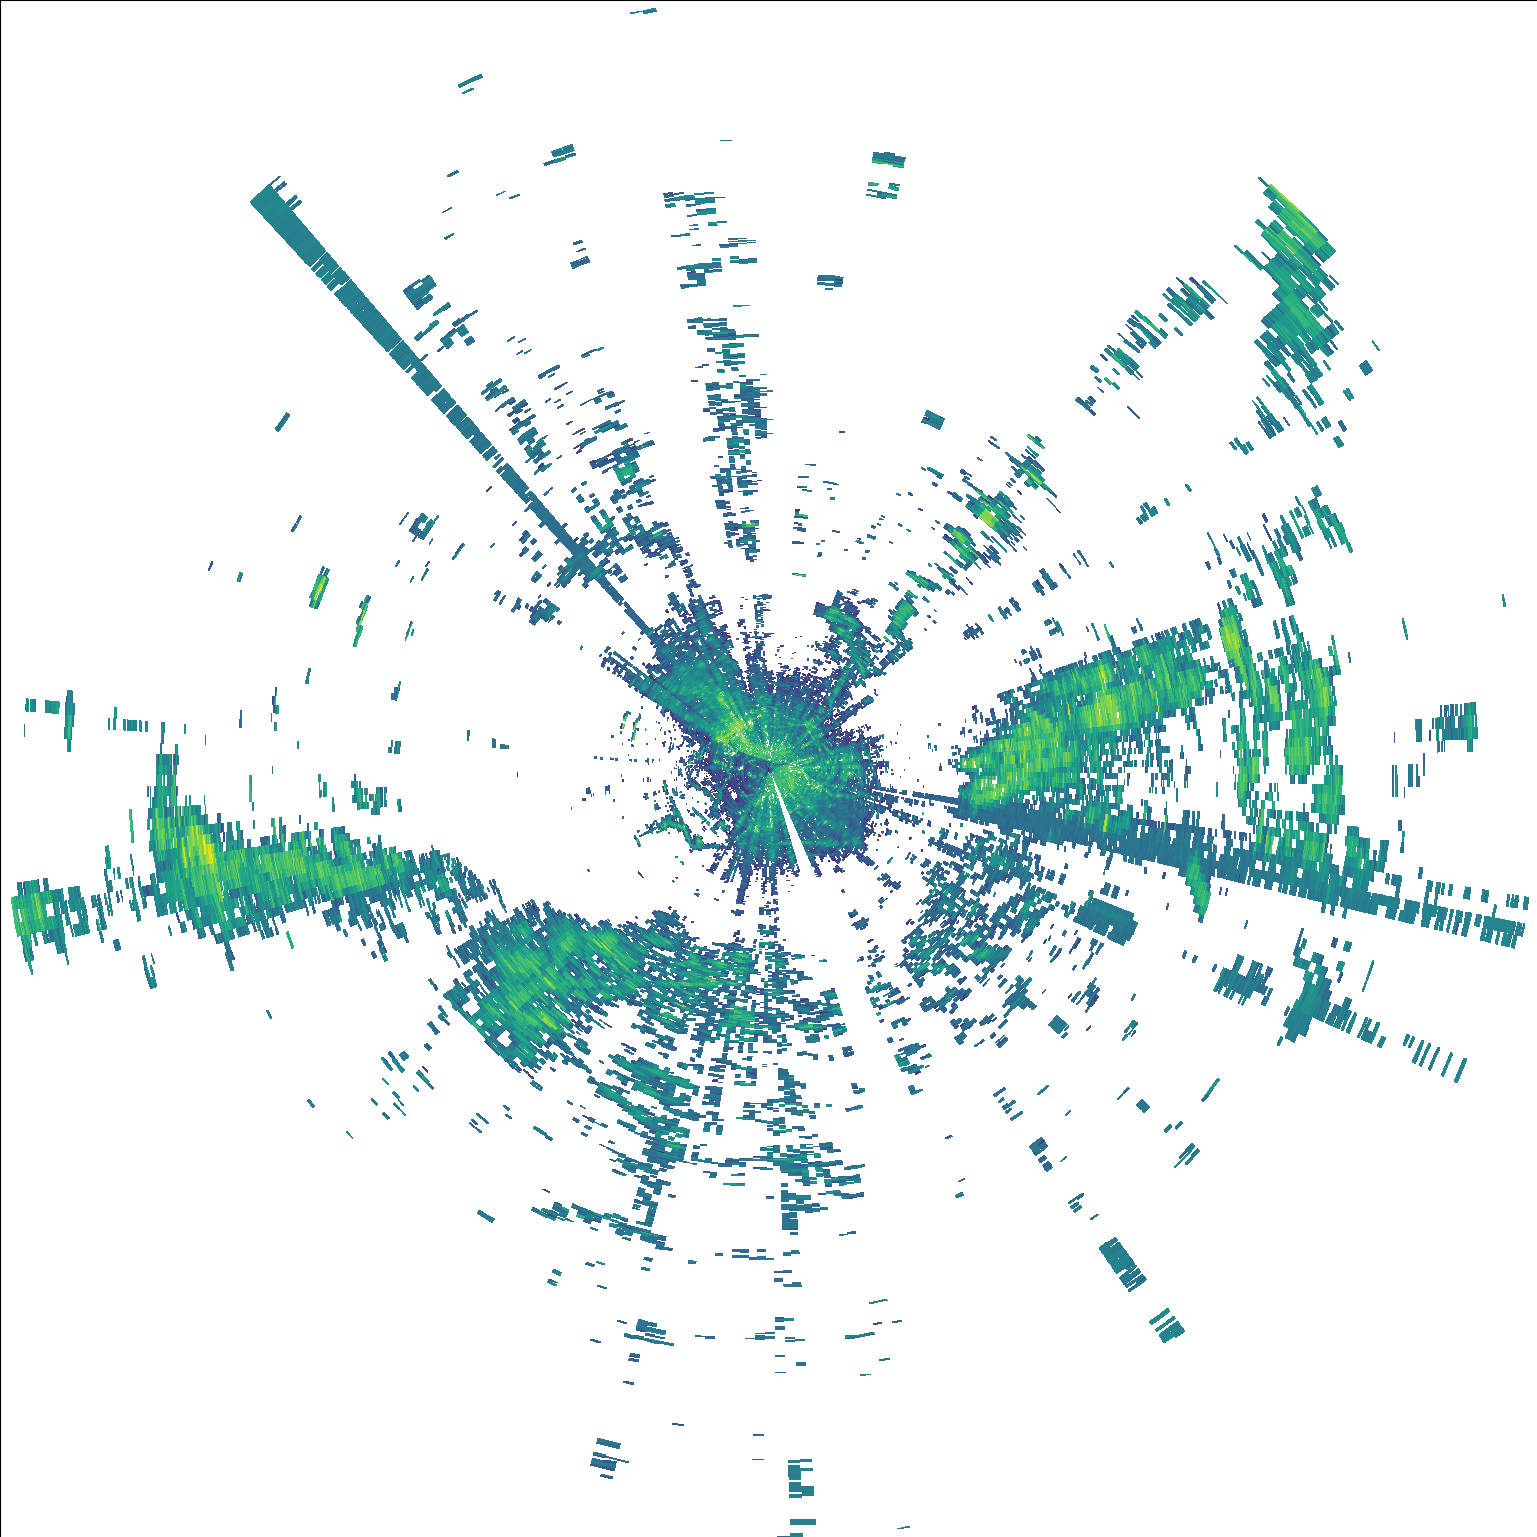

To crop the radar image, we need three pieces of information.
1. A sample radar image.
2. A center of the radar = (Latitude = 24.3722, Longitude = 54.467).
3. Range of values = 239.5 Kilometers. (Area coverage or area covered by the radar)
4. Find the four points 2,3,4, and 5 shown in re) as shown below.

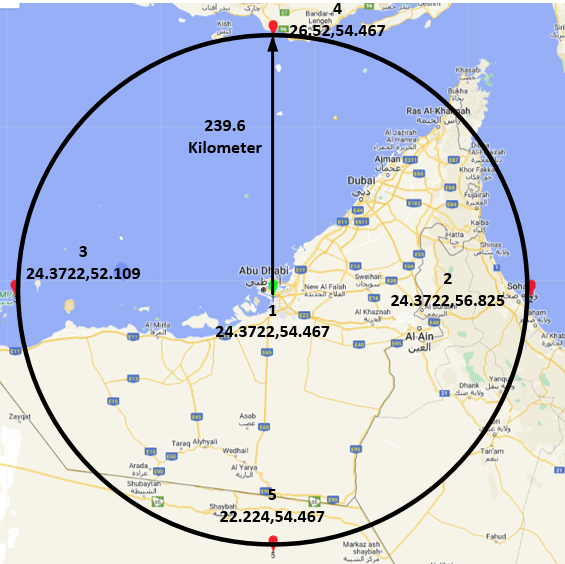

Blue dots show the region to be cropped.

Red dots show the area covered by the radar.

Green dot shows the center of the radar. 


This information can be plotted using the following website.

https://mobisoftinfotech.com/tools/plot-multiple-points-on-map/


24.3722,54.467,#00FF00,marker,"X"

24.3722,56.825,red,marker,"X"

24.3722,52.109,red,marker,"X"

26.52,54.467,red,marker,"X"

22.224,54.467,red,marker,"X"

25,56,circle,marker,"X"

24,56,circle,marker,"X"

25,55,circle,marker,"X"

24,55,circle,marker,"X"



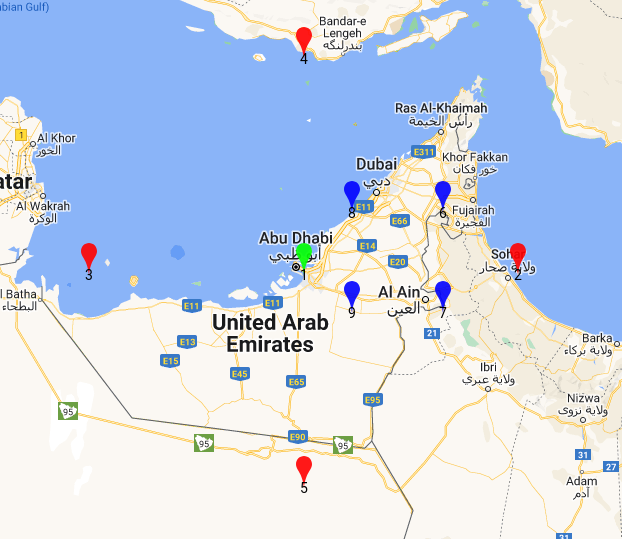

Image shape:  (1537, 1537)


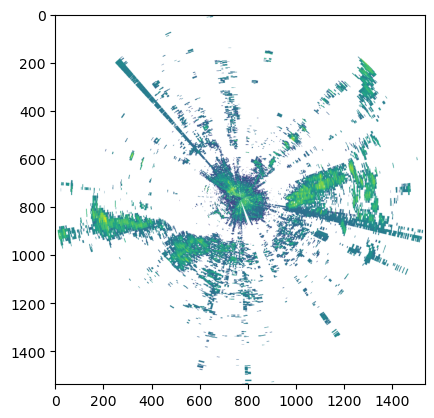

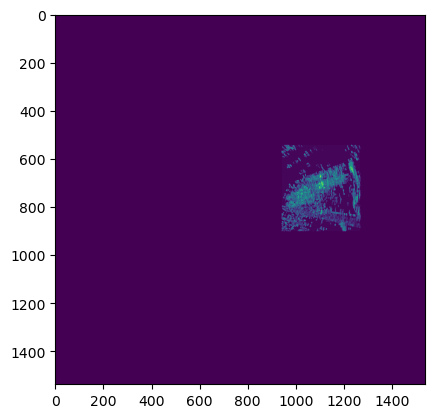

544 901 942 1267


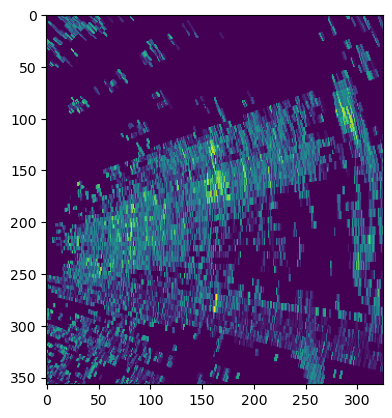

In [4]:
import pandas as pd
import numpy as np
from PIL import Image
import os 
from matplotlib import pyplot as plt
import cv2

image = Image.open('sampleradarimage.png')
numpydata = np.asarray(image)
print("Image shape: ",numpydata.shape)

# Find the latmin, latmax, lonmin, and lonmax from the above values.
LATmin = 52.109 
LATmax = 56.825
LONmin = 22.2244
LONmax = 26.52

lat = np.linspace(LATmin, LATmax, numpydata.shape[1])
lat = np.vstack([lat]*numpydata.shape[0])
lon = np.linspace(LONmax, LONmin, numpydata.shape[0]) 
lon = np.transpose([lon] *numpydata.shape[1])


x1 = lat.copy()
x2 = lat.copy()
x3 = lat.copy()
x4 = lat.copy()
xx1 = 55
xx2 =  56

x1[x1>=xx1] = 1
x2[x2<=xx2] = 1
x3[x3<xx1] = 0
x4[x4>xx2] = 0
X = np.multiply(np.multiply(np.multiply(np.multiply(x1, x2),x3),x4),lat)


yy1 = 24
yy2 = 25
x1 = lon.copy()
x2 = lon.copy()
x3 = lon.copy()
x4 = lon.copy()
x1[x1>=yy1] = 1
x2[x2<=yy2] = 1
x3[x3<yy1] = 0
x4[x4>yy2] = 0

Y = np.multiply(np.multiply(np.multiply(np.multiply(x1, x2),x3),x4),lat)
finalimage = np.multiply(np.multiply(X,Y),numpydata)


plt.imshow(image)
plt.show()
plt.imshow(finalimage)
plt.show()

imagecordxmin =  min(np.where(finalimage != 0)[0])
imagecordxmax = max(np.where(finalimage != 0)[0])
imagecordymin = min(np.where(finalimage != 0)[1])
imagecordymax = max(np.where(finalimage != 0)[1])
print(imagecordxmin,imagecordxmax,imagecordymin,imagecordymax)

finalimage = np.array(image)
finalimage = finalimage[imagecordxmin:imagecordxmax,imagecordymin:imagecordymax]
plt.imshow(finalimage)
plt.show()